In [1]:
from libraries import lib
import qutip as qt
import torch.nn as nn 
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import *

In [2]:
N, J, Gamma = 2, 1, 1

In [3]:
lib.TFIM_hamiltonian(N, J, Gamma).eigenstates()[0][0]

np.float64(-2.82842712474619)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
input = lib.generate_input_torch(N)
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])

cpu


In [5]:
model = KAN(width=[2, 1, 2], device=device)

checkpoint directory created: ./model
saving model version 0.0


In [6]:
vars = (N, J, Gamma)
loss_fn = lib.TFIM_expectation_from_torch
epochs = []
loss_data = []
optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)
for epoch in range(5):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)
    epochs.append(epoch)
    loss_data.append(loss_fn(model(input), vars, amp_phase).item())

# find groud state
gs = lib.model_to_ground_state(model, input, amp_phase)

In [7]:
loss_data[-1]

-2.828427314758301

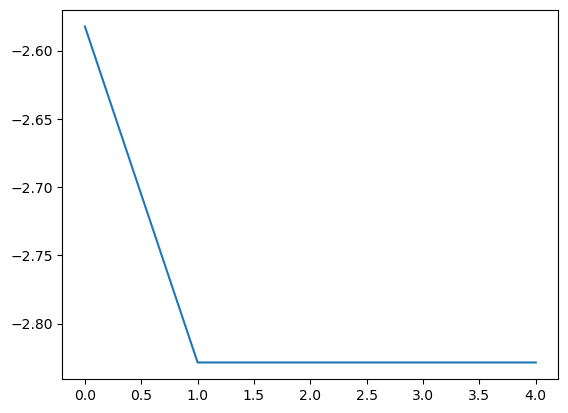

In [8]:
plt.plot(epochs, loss_data)
plt.show()

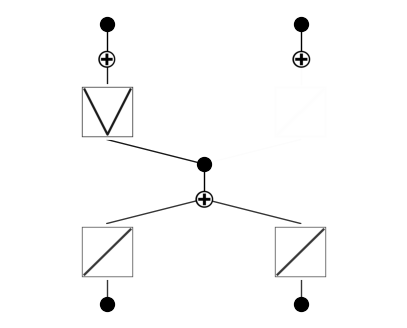

In [9]:
model.plot()

In [10]:
model.suggest_symbolic(0, 0, 0);

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        x    0.999991 -15.69726           1                1   -2.339452
1      x^2    1.000000 -16.66218           2                2   -1.732436
2    1/x^2    1.000000 -16.66218           2                2   -1.732436
3      1/x    1.000000 -16.66218           2                2   -1.732436
4      exp    1.000000 -16.66218           2                2   -1.732436


In [11]:
model.suggest_symbolic(1, 0, 0);

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0    1/x^2    1.000000 -16.626942           2                2   -1.725388
1      1/x    0.999982 -15.139620           2                2   -1.427924
2      x^2    0.999942 -13.848004           2                2   -1.169601
3    1/x^3    1.000000 -16.626942           3                3   -0.925388
4      x^4    1.000000 -16.558947           3                3   -0.911789


In [12]:
model.suggest_symbolic(1, 0, 1);

  function    fitting r2    r2 loss  complexity  complexity loss  total loss
0        0  0.000000e+00   0.000014           0                0    0.000003
1        x  3.582738e-07   0.000014           1                1    0.800003
2    1/x^4  9.997222e-01 -11.762858           4                4    0.847428
3      exp  9.158978e-01  -3.571541           2                2    0.885692
4    1/x^2  6.707196e-01  -1.602568           2                2    1.279486


In [13]:
model.fix_symbolic(0, 0, 0, 'x')
model.fix_symbolic(0, 1, 0, 'x')
model.fix_symbolic(1, 0, 0, 'abs')
model.fix_symbolic(1, 0, 1, '0')

Best value at boundary.
r2 is 0.9999911785125732
saving model version 0.1
Best value at boundary.
r2 is 0.9999910593032837
saving model version 0.2
r2 is 0.9993871450424194
saving model version 0.3
Best value at boundary.
r2 is 0.0
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.4


tensor(0.)

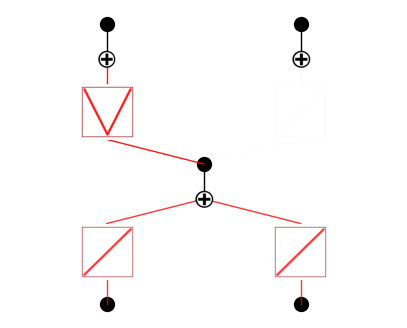

In [14]:
model.plot()

In [15]:
nsimplify(ex_round(model.symbolic_formula()[0][0], 2))

Abs(13*x_1/4 + 13*x_2/4 - 13/4)/25 + 8/89

In [16]:
nsimplify(ex_round(model.symbolic_formula()[0][1], 2))

3/100

In [17]:
loss_fn(model(input), vars, amp_phase).item()

-2.828427314758301

In [18]:
for epoch in range(5):
    def closure():
        optimizer.zero_grad()
        loss = loss_fn(model(input), vars, amp_phase)
        loss.backward()
        return loss

    optimizer.step(closure)

In [19]:
loss_fn(model(input), vars, amp_phase).item()

-2.828427314758301